202101070094

**Name**: Omkar Awari

A4 Batch

**Problem Statement** : to Perform Standardization



In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/DataSets/ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Standardization

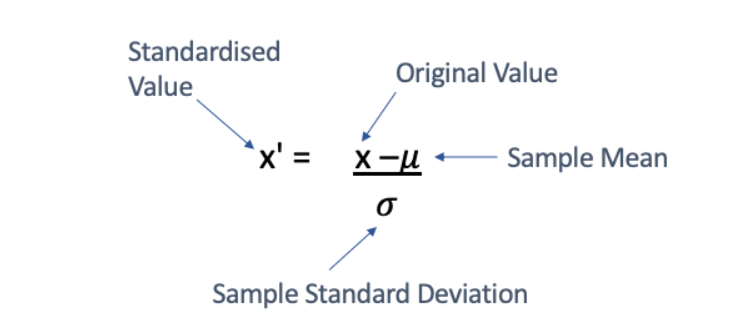

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
63,32,120000,1
360,43,129000,1
345,41,63000,0
161,25,90000,0
204,58,101000,1


train split for standardization

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),
                                                   df['Purchased'],
                                                   test_size=0.3,
                                                   random_state=0)
x_train.shape, x_test.shape

((280, 2), (120, 2))

Standard Scaler

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fir the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and tests sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [9]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [10]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [11]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [12]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Effect of standard Scaling

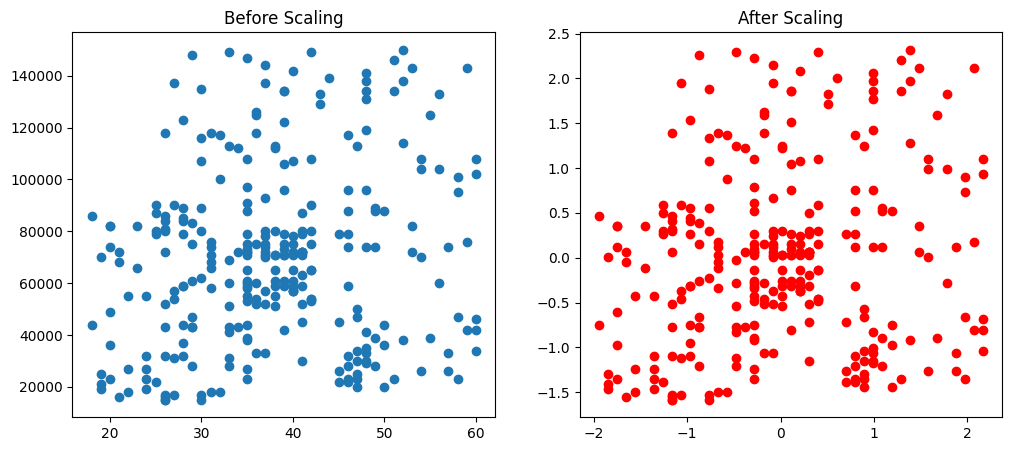

In [13]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

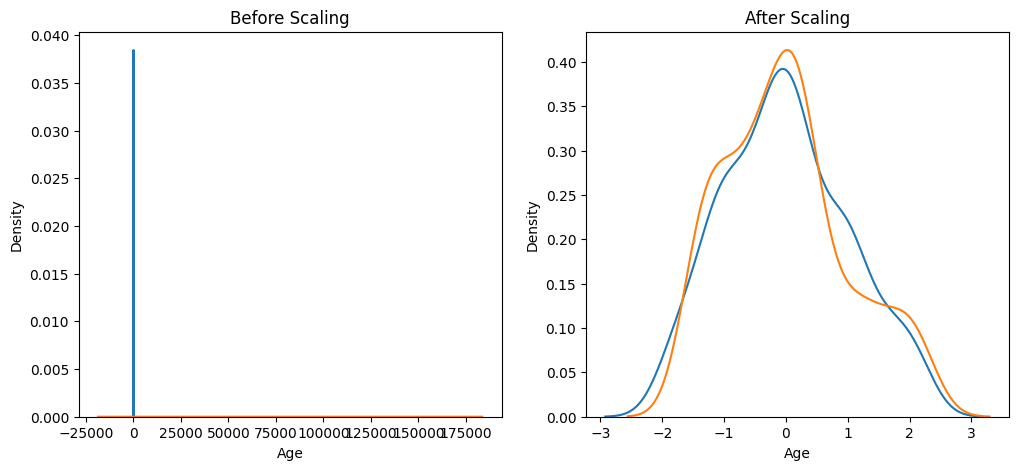

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))


ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

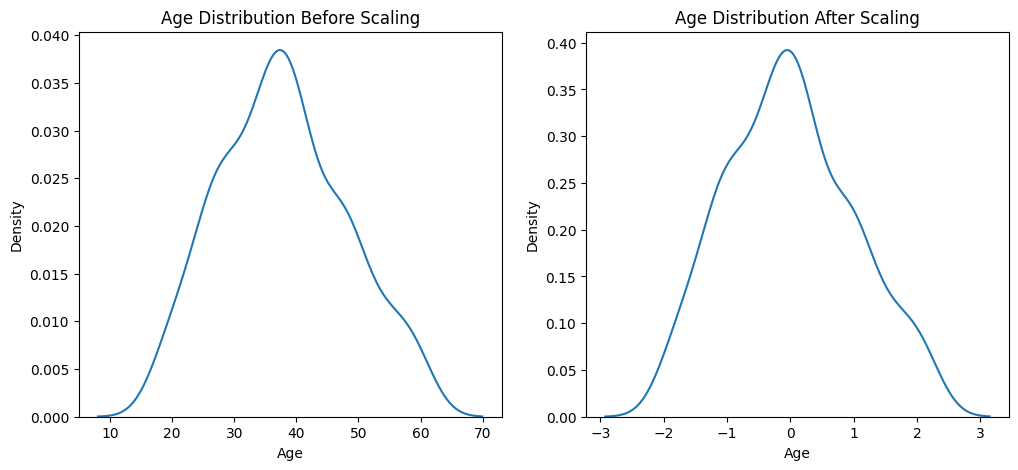

In [15]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))


ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)

ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
plt.show()

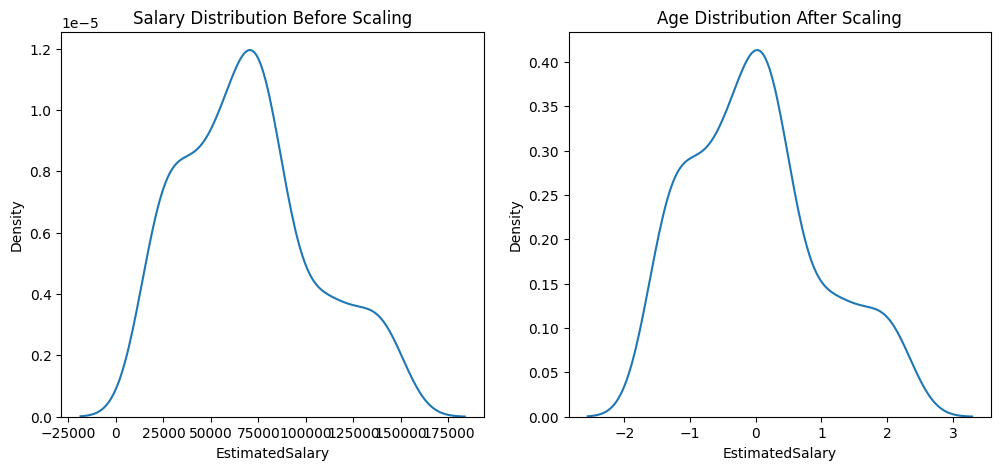

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))


ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

Why scaling is important?

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

from sklearn.metrics import accuracy_score

print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


Normalization

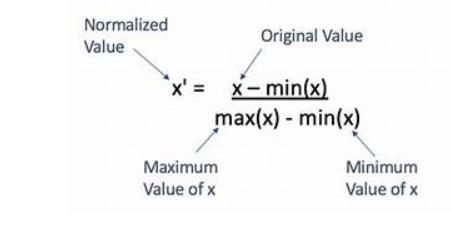

In [18]:
import pandas as pd
dfn=pd.read_csv("/content/drive/MyDrive/DataSets/wine.csv")
dfn.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<Axes: xlabel='Alcohol', ylabel='Density'>

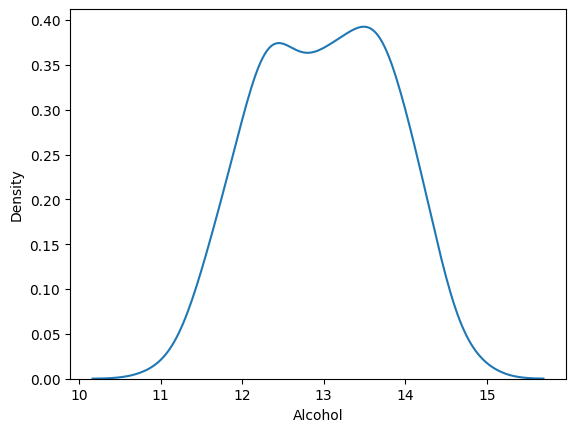

In [19]:
sns.kdeplot(dfn['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

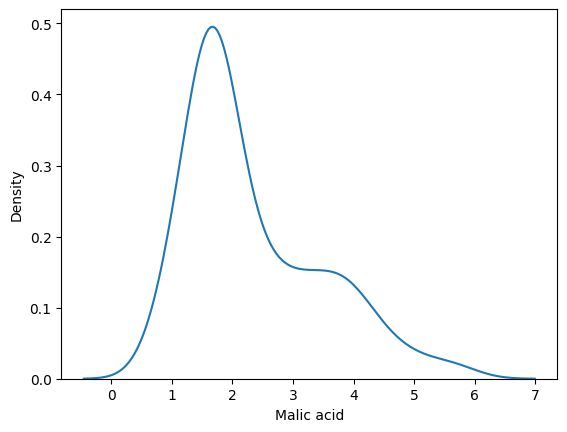

In [20]:
sns.kdeplot(dfn['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

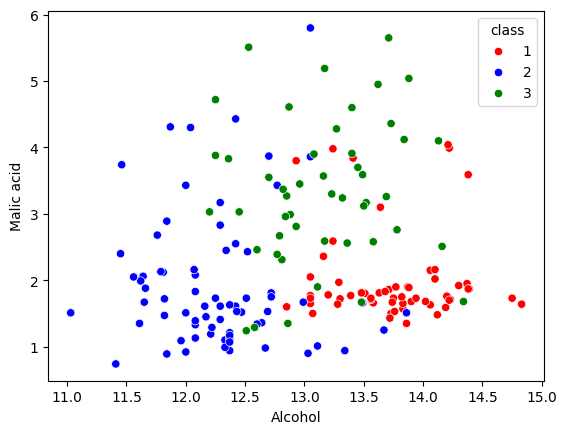

In [21]:
color_dict = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(data=dfn, x='Alcohol', y='Malic acid', hue='class', palette=color_dict)

Train Split for normalization

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfn.drop('class',axis=1),
                                                   dfn['class'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((124, 13), (54, 13))

MinMax Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

scalern = MinMaxScaler()

#fit the scaler to the train set, it will learn the parameters
scalern.fit(X_train)

# transform train and test sets
X_train_scaled = scalern.transform(X_train)
X_test_scaled = scalern.transform(X_test)

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [25]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0
mean,13.0,2.4,2.4,19.5,100.1,2.3,2.0,0.4,1.6,5.0,1.0,2.6,746.8
std,0.8,1.1,0.3,3.6,14.7,0.6,1.0,0.1,0.6,2.4,0.2,0.7,308.9
min,11.0,0.9,1.4,10.6,70.0,1.1,0.5,0.1,0.4,1.3,0.5,1.3,312.0
25%,12.4,1.6,2.2,17.1,89.0,1.7,1.1,0.3,1.2,3.0,0.8,1.9,510.0
50%,13.0,1.9,2.4,19.4,98.0,2.2,2.1,0.3,1.6,4.6,1.0,2.8,667.5
75%,13.6,3.2,2.6,21.7,106.2,2.7,2.8,0.4,2.0,6.4,1.1,3.2,986.2
max,14.8,5.6,3.2,30.0,162.0,3.9,3.7,0.7,3.6,11.8,1.7,4.0,1547.0


In [26]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0
mean,0.5,0.3,0.5,0.5,0.3,0.4,0.5,0.4,0.4,0.4,0.4,0.5,0.4
std,0.2,0.2,0.1,0.2,0.2,0.2,0.3,0.2,0.2,0.2,0.2,0.3,0.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.4,0.2,0.5,0.3,0.2,0.2,0.2,0.3,0.3,0.2,0.2,0.2,0.2
50%,0.5,0.2,0.5,0.5,0.3,0.4,0.5,0.4,0.4,0.3,0.4,0.6,0.3
75%,0.7,0.5,0.6,0.6,0.4,0.6,0.7,0.6,0.5,0.5,0.5,0.7,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


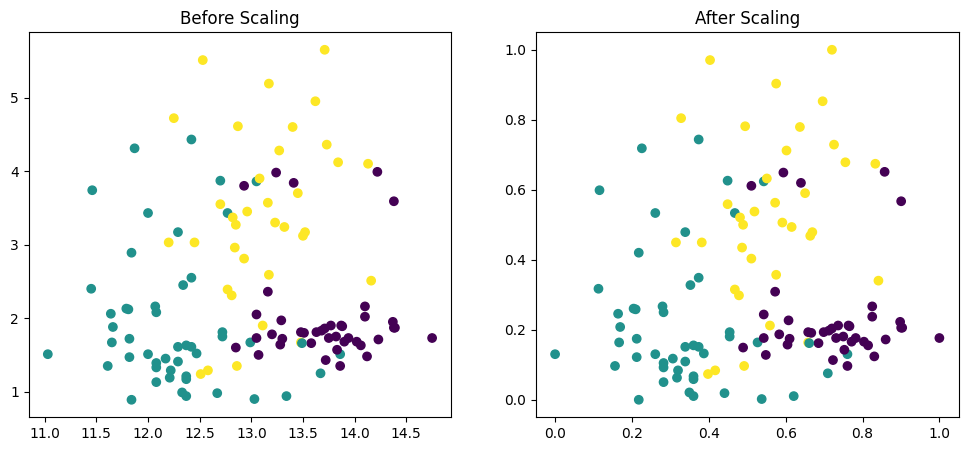

In [27]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=Y_train)
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=Y_train)
ax2.set_title('After Scaling')
plt.show()

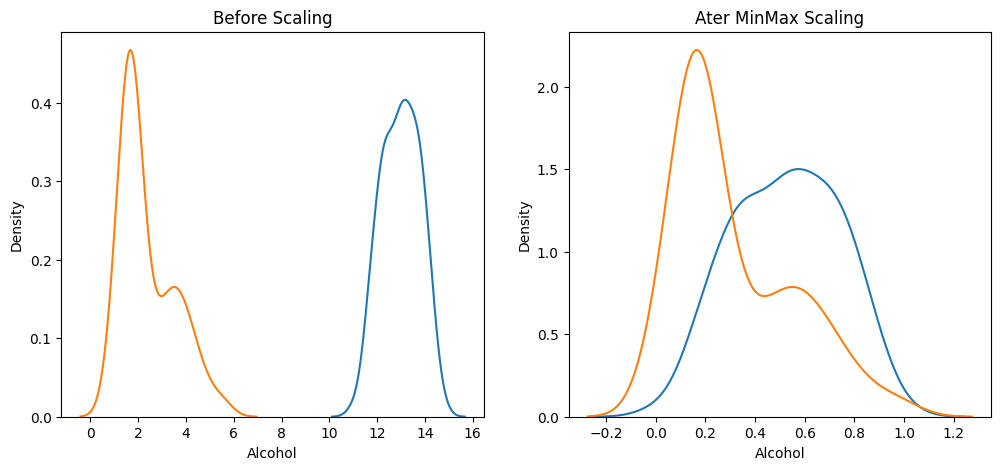

In [28]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)

#After scaling
ax2.set_title('Ater MinMax Scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
plt.show()

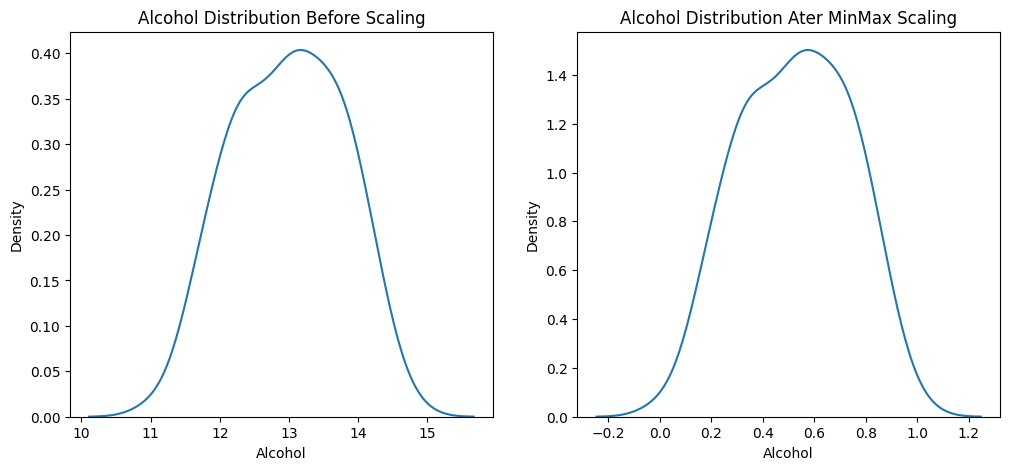

In [29]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)

#After scaling
ax2.set_title('Alcohol Distribution Ater MinMax Scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
plt.show()

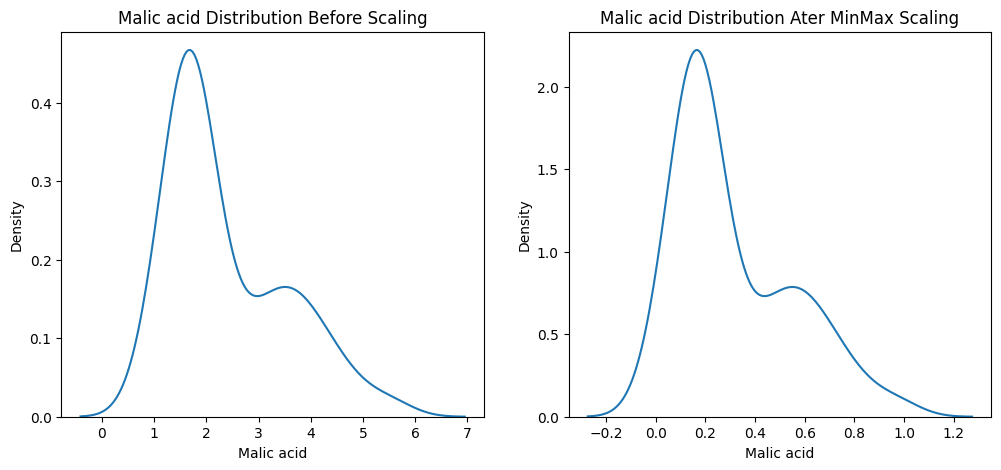

In [30]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'],ax=ax1)

#After scaling
ax2.set_title('Malic acid Distribution Ater MinMax Scaling')
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
plt.show()